<a href="https://colab.research.google.com/github/akshaypat444/tensorflow_practice/blob/main/02_Neural_Networks_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

1. Docstring Shortcut - Shift + Cmd + Space

## Input Shape for Images Classification

1. Batch Size (32 is very common batch size)
2. Width
3. Height
4. Color Channels

## Activation function

1. For binary classification - Sigmoid
2. For multiclass classfication - SoftMax
3. Usually in dense layers - ReLU

## Loss Function

1. Binary CrossEntropy
2. Multiclass CrossEntropy

## Create Data for Binary classification 1/0

In [67]:
## Create 1000 examples
n_samples = 1000


# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [68]:
circles = pd.DataFrame({"X0": X[:, 0], "X1":X[:, 1], "label": y })
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


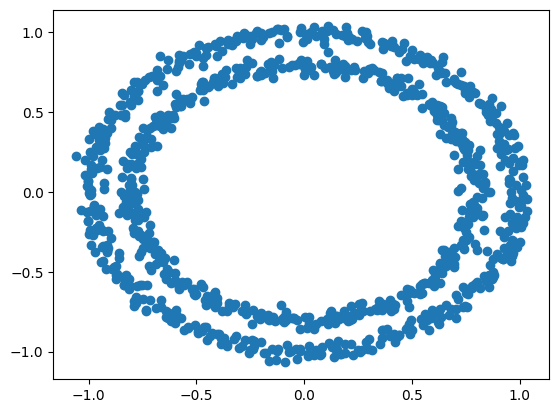

In [69]:
plt.scatter(X[:, 0], X[:, 1])

## Input and Output Shapes

In [70]:
X.shape, y.shape

((1000, 2), (1000,))

In [71]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Model 1



In [72]:
tf.random.set_seed(42)


# Create a Model
circle_classification_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_classification_model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                                    optimizer=tf.keras.optimizers.SGD(),
                                    metrics="accuracy")

# Fit the model
circle_classification_model_1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1033 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 5.1870 - accuracy: 0.4520
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 5.0926 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 5.0917 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 2.7997 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7478 - accuracy: 0.4940
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7087 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6992 - accuracy: 0.4970
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6959 - accuracy: 0.4960
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4790
Epoch 11/

In [73]:
circle_classification_model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693244993686676, 0.5]

## Model 2

Trying to make model a bit more complex by adding extra hidden layer since it's accuracy is only 50%

In [74]:
tf.random.set_seed(42)


# Create a Model
circle_classification_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_classification_model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                                    optimizer=tf.keras.optimizers.SGD(),
                                    metrics="accuracy")

# Fit the model
circle_classification_model_2.fit(X, y, epochs=100, verbose=0)

In [75]:
circle_classification_model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932643055915833, 0.5]

## Model 3 - Improvement

Common ways to improve the model

1. Adding more hidden layers
2. Increase the number of hidden units
3. Change the activation function
4. Change the optimzation function
5. Change the learning rate
6. Fitting on more data
7. Fitting for longer

In [76]:
tf.random.set_seed(42)


# Create a Model
circle_classification_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_classification_model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                                    optimizer=tf.keras.optimizers.Adam(),
                                    metrics="accuracy")

# Fit the model
circle_classification_model_3.fit(X, y, epochs=100, verbose=0)

In [77]:
circle_classification_model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6966 - accuracy: 0.5130


[0.6965533494949341, 0.5130000114440918]

### Accuracy is still the same even with 2 hidden units and more neurons added with Adam optimizer. Model isn't learning at all. What's happening? ###

In [78]:
y_preds = circle_classification_model_3.predict(X)

32/32 [==============================] - 0s 2ms/step


In [79]:
def plot_decision_boundary(model, X, y):
  """ Plot decision boundary created by model predicting on X
  """
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.xlim(yy.min(), yy.max())


313/313 [==============================] - 0s 930us/step
Doing binary classification


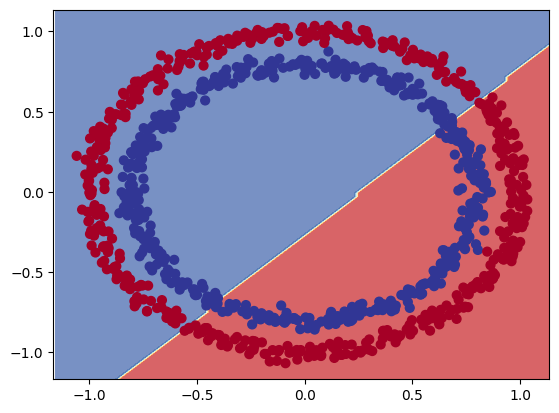

In [80]:
plot_decision_boundary(model=circle_classification_model_3, X=X, y=y)

In [85]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

circle_classification_model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

## Binary classfication model will not work for regression problem.

In [86]:
tf.random.set_seed(42)


# Create a Model
circle_classification_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_classification_model_4.compile(loss=tf.keras.losses.mae,
                                    optimizer=tf.keras.optimizers.Adam(),
                                    metrics="mae")

# Fit the model on regression data
circle_classification_model_4.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 530.0610 - mae: 530.0610
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 420.7251 - mae: 420.7251
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 316.2523 - mae: 316.2523
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 208.1264 - mae: 208.1264
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 95.4833 - mae: 95.4833
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 60.0216 - mae: 60.0216
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 82.7962 - mae: 82.7962
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 62.9698 - mae: 62.9698
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 44.8815 - mae: 44.8815
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 52.2669 - mae: 52.2669
Epoch 11/100
5/5 [==============================] -

In [87]:
circle_classification_model_4.evaluate(X_reg_test, y_reg_test)

2/2 [==============================] - 0s 5ms/step - loss: 62.2197 - mae: 62.2197


[62.2197380065918, 62.2197380065918]

In [88]:
y_reg_preds = circle_classification_model_4.predict(X_reg_test)

2/2 [==============================] - 0s 3ms/step


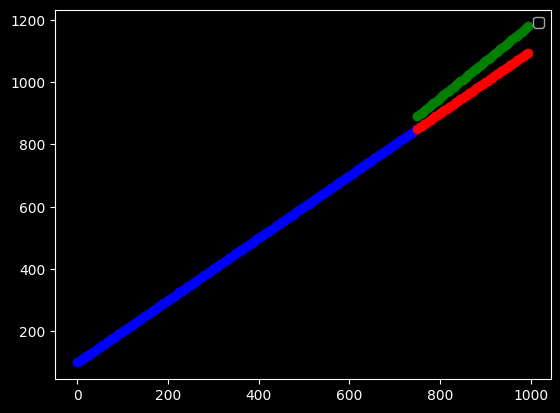

In [89]:
plt.scatter(X_reg_train, y_reg_train, c="b")
plt.scatter(X_reg_test, y_reg_test, c="r")
plt.scatter(X_reg_test, y_reg_preds, c="g")
plt.legend();

In [90]:
tf.random.set_seed(42)

# Create a Model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history_model_4 = model_4.fit(X, y, epochs=100, verbose=0)

In [91]:
model_4.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 4.5542 - accuracy: 0.4660


[4.554159641265869, 0.4659999907016754]

313/313 [==============================] - 0s 913us/step
Doing binary classification


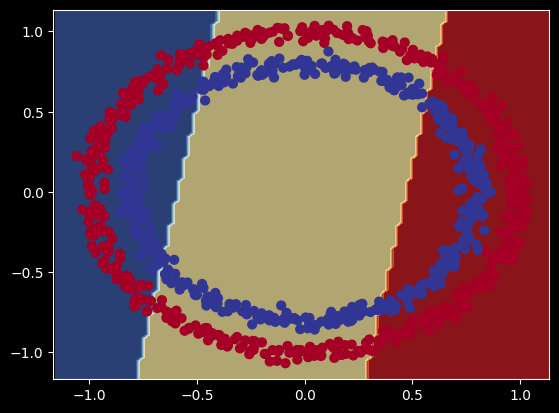

In [92]:
plot_decision_boundary(model_4, X, y)

## Model 5 - Introducing Non-Linearity

In [93]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="relu"),
])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 7.2533 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [94]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 999us/step
Doing binary classification


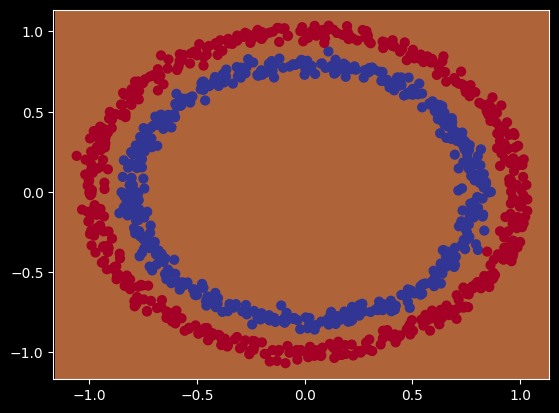

In [95]:
plot_decision_boundary(model_5, X, y)

## Model 6

In [96]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Fit the model
history = model_6.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.5240
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5270
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5560
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.5990
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.6520
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.7110
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.7410
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.8240
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8750
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.9270
Epoch 11/

In [97]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9880


[0.02948874980211258, 0.9879999756813049]

313/313 [==============================] - 0s 953us/step
Doing binary classification


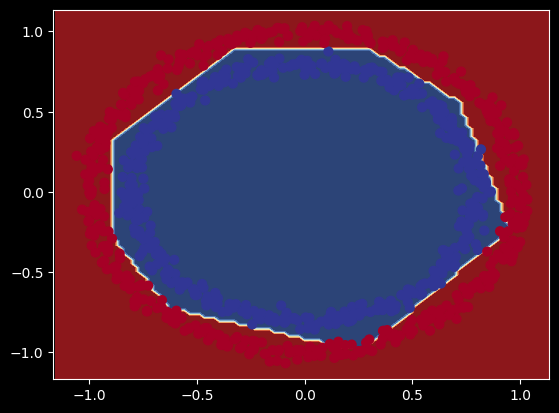

In [98]:
plot_decision_boundary(model_6, X, y)

## This model gave 99% accuracy and decision boundry fits perfectly. But we don't have the actual testing data for evaluating the model.

In [99]:
print("DONE")

DONE


In [100]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

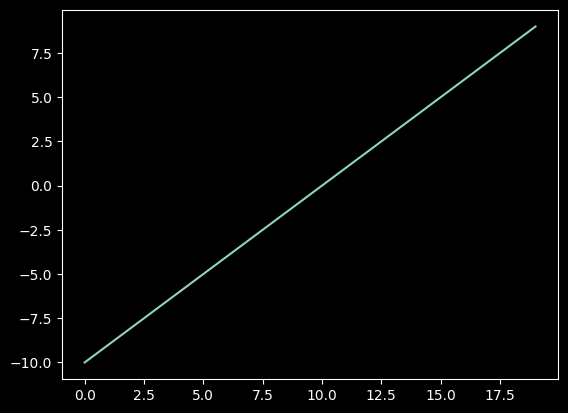

In [101]:
# Visualize our toy tensor
plt.style.use('dark_background')
plt.plot(A)

## Sigmoid activation function

In [102]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [103]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

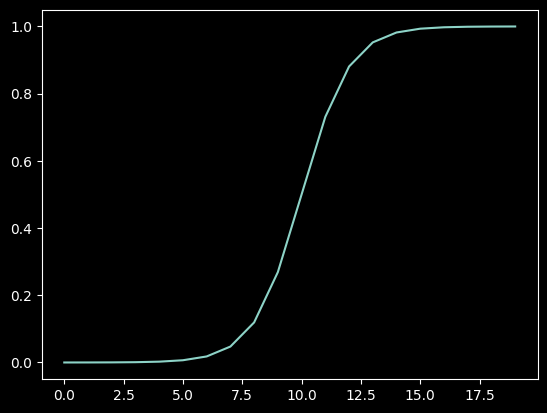

In [104]:
plt.plot(sigmoid(A))

## Relu activation function

In [105]:
def relu(x):
 return tf.maximum(0, x)

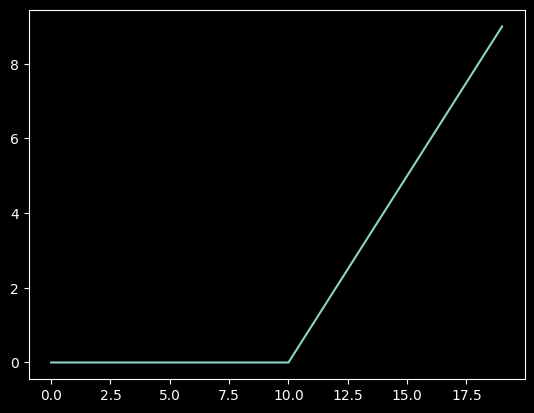

In [106]:
plt.plot(relu(A))

In [107]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

## Model 7 - Evaluating and improving classification model using test data

In [108]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [109]:
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_7.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 1ms/step - loss: 0.7183 - accuracy: 0.4900
Epoch 2/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6979 - accuracy: 0.4275
Epoch 3/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.4387
Epoch 4/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5450
Epoch 5/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.5638
Epoch 6/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.5638
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.5813
Epoch 8/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6392 - accuracy: 0.6438
Epoch 9/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6075 - accuracy: 0.7025
Epoch 10/50
25/25 [==============================] - 0s 1ms/step - loss: 0.5605 - accuracy: 0.7713
Epoch 11/50
25/25 [

In [110]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 1.0000


[0.029255621135234833, 1.0]

313/313 [==============================] - 0s 1ms/step
Doing binary classification
313/313 [==============================] - 0s 913us/step
Doing binary classification


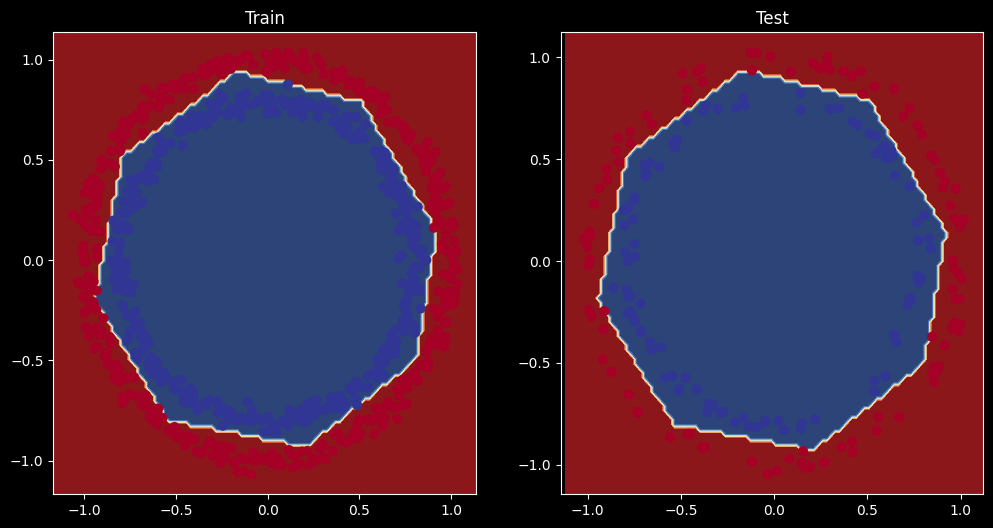

In [111]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_7, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_7, X_test, y_test)

## Plot the model learning graph

Text(0.5, 0, 'epochs')

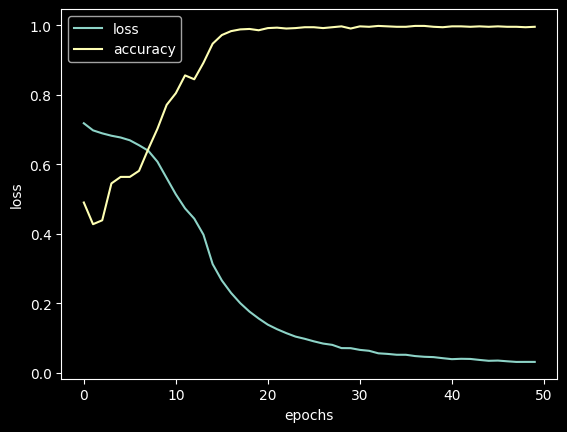

In [112]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Model 8 - Finding the best learning rate -> Learning rate callback

In [113]:
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_9 = model_8.fit(X_train, y_train, epochs=100, callbacks=[lr_schedular])

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.7188 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7177 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7167 - accuracy: 0.5050 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7155 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7143 - accuracy: 0.5050 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7130 - accuracy: 0.5050 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7116 - accuracy: 0.5063 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7103 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

Text(0.5, 0, 'epochs')

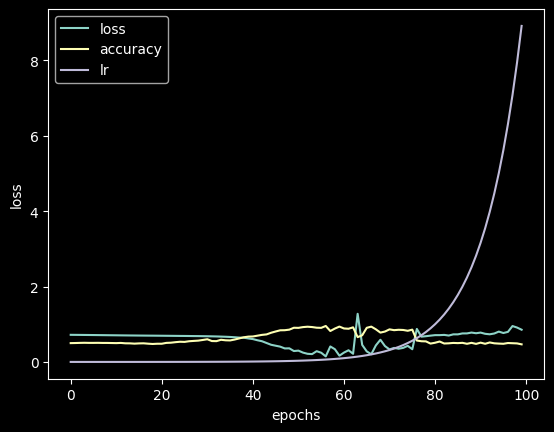

In [114]:
pd.DataFrame(history_9.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Ideal learning rates -> 1, 0.1, 0.01, 0.001, 0.0001

In [115]:
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.04),
                metrics=["accuracy"])



# Fit the model
history_10 = model_9.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.6946 - accuracy: 0.5188
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6734 - accuracy: 0.5825
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.6625
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5142 - accuracy: 0.8138
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.9287
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2143 - accuracy: 0.9650
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1399 - accuracy: 0.9787
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0974 - accuracy: 0.9900
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0904 - accuracy: 0.9862
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0710 - accuracy: 0.9875
Epoch 11/

In [116]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9850


[0.037228912115097046, 0.9850000143051147]

313/313 [==============================] - 0s 919us/step
Doing binary classification
313/313 [==============================] - 0s 912us/step
Doing binary classification


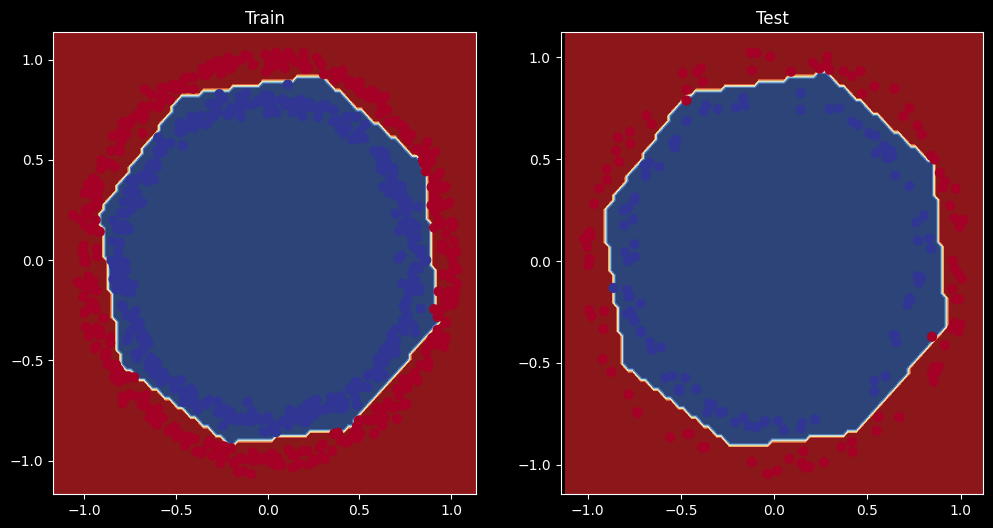

In [117]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9, X_test, y_test)

## More classification evaluation methods
1. Accuracy is not good metric for imbalanced data
2. Precision
3. Recall
4. F1 score
5. Confusion Matrix
6. Classification report

In [118]:
# Check the accuracy of our Model
loss, accuracy = model_9.evaluate(X_test, y_test)
loss, accuracy*100

7/7 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9850


(0.037228912115097046, 98.50000143051147)

In [119]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_9.predict(X_test)

# Create confusion_matrix
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[99,  2],
       [ 1, 98]])

## Visualize confusion matrix

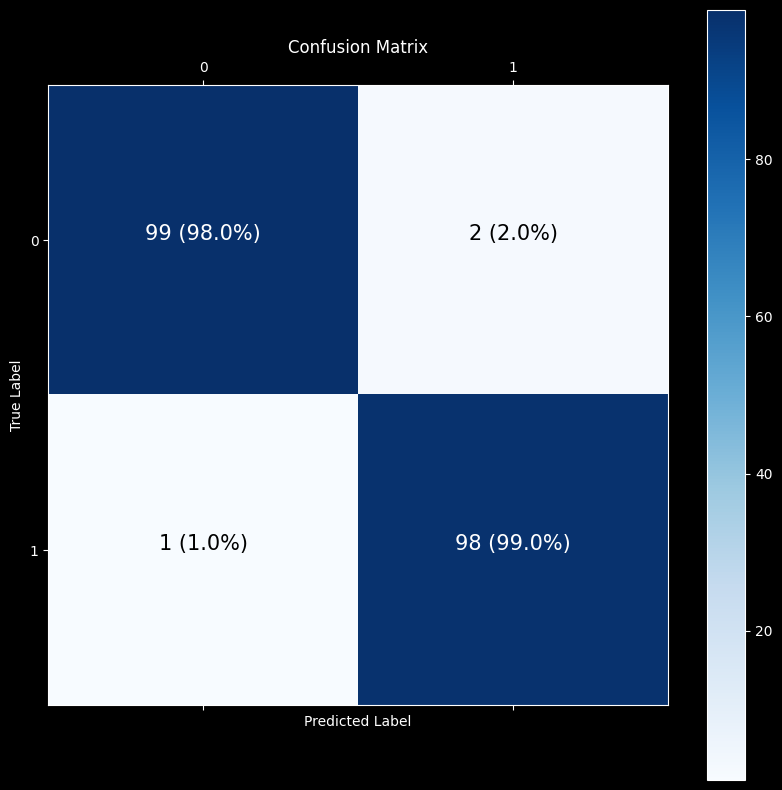

In [120]:
import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
   labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix", xlabel="Predicted Label", ylabel="True Label",
      xticks=np.arange(n_classes), yticks=np.arange(n_classes),
       xticklabels=labels, yticklabels=labels)

threshold = (cm.max() + cm.min()) / 2


for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Multiclass Classification
* Classifying clothing items - fashion_mnist

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [9]:
(train_data.shape, train_labels.shape), (test_data.shape, test_labels.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [10]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [11]:
train_labels[0]

9

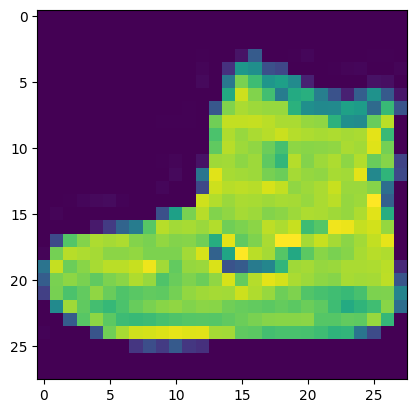

In [12]:
plt.imshow(train_data[0])

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

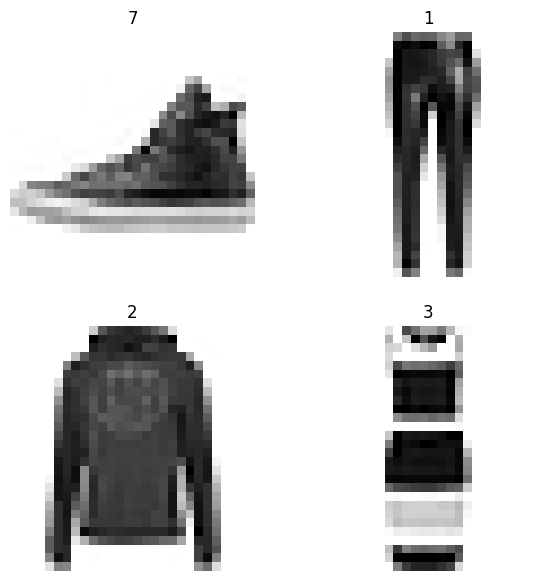

In [14]:
# Plot multiple random images of fashion mnist
import random

plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(train_labels[rand_index])
  plt.axis(False)

## Mnist Model 1 - Multiclass classification

1. input_shape = 28 * 28 (shape of one image)
2. output_shape = 10 (one per class of clothing)
3. loss function = categorical cross entropy (if labels are one hot encoded else use sparse categorial cross entropy)
4. output_activation = softmax

## Model Additions

1. **Introducing flatten layer which will flatten the 28 * 28 image into 784**
2. **Introducing SparseCategoricalCrossentropy loss function because our outputs are not one hot encoded**

In [15]:
train_data.shape

(60000, 28, 28)

In [16]:
tf.random.set_seed(42)

# Create a model
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compiel a model
mnist_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                    metrics=["accuracy"])

# Fit a model
non_norm_history = mnist_model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.4690 - accuracy: 0.1011 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3040 - accuracy: 0.0972 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3040 - accuracy: 0.0993 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3040 - accuracy: 0.0998 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3039 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.0978 - val_loss: 2.3031 - val_accuracy:

In [17]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Normalize the data

In [18]:
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()

train_data_norm.min(), test_data_norm.max()

(0.0, 1.0)

## Model 2 - Training the Mnist model on normalized data

In [19]:
tf.random.set_seed(42)

# Create a model
mnist_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compiel a model
mnist_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                    metrics=["accuracy"])

# Fit a model
norm_history_2 = mnist_model_2.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6332 - accuracy: 0.2960 - val_loss: 1.6351 - val_accuracy: 0.2753
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5134 - accuracy: 0.3465 - val_loss: 1.4985 - val_accuracy: 0.3573
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4969 - accuracy: 0.3548 - val_loss: 1.5007 - val_accuracy: 0.3509
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4820 - accuracy: 0.3617 - val_loss: 1.5335 - val_accuracy: 0.3437
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4777 - accuracy: 0.3654 - val_loss: 1.4796 - val_accuracy: 0.3734
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4732 - accuracy: 0.3673 - val_loss: 1.5087 - val_accuracy: 0.3417
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4698 - accuracy: 0.3702 - val_loss: 1.4833 - val_accuracy:

Text(0.5, 0, 'epochs')

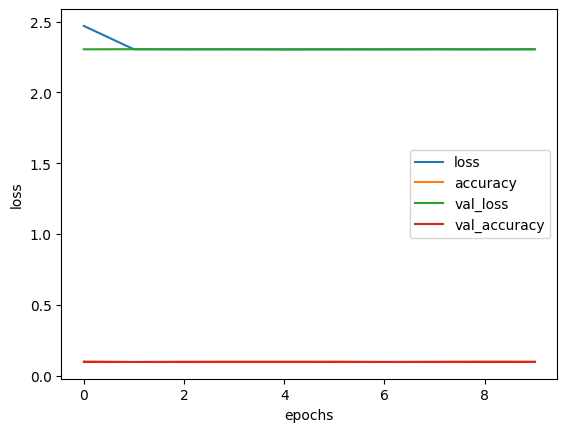

In [20]:
pd.DataFrame(non_norm_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

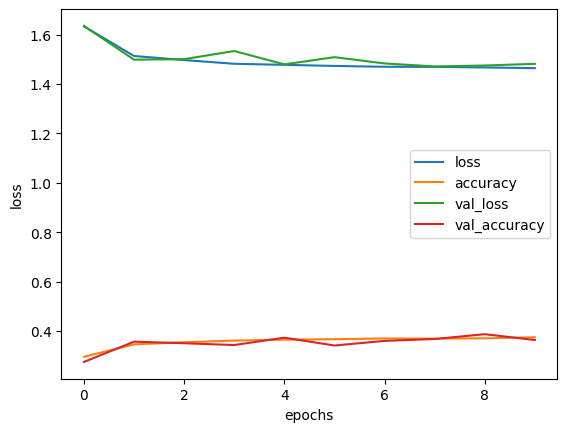

In [21]:
pd.DataFrame(norm_history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🔑 **NOTE** - Neural networks prefer data in scaled/normalized form i.e. between 0 and 1

## Mnist Model 3

In [22]:
tf.random.set_seed(42)

# Create a model
mnist_model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compiel a model
mnist_model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                    metrics=["accuracy"])


# Create learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit a model
norm_history_3 = mnist_model_3.fit(train_data_norm, train_labels, epochs=50, validation_data=(test_data_norm, test_labels), callbacks=[lr_schedular])

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4000 - accuracy: 0.4666 - val_loss: 1.0651 - val_accuracy: 0.6329 - lr: 0.0010
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8101 - accuracy: 0.7038 - val_loss: 0.7228 - val_accuracy: 0.7141 - lr: 0.0011
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6618 - accuracy: 0.7351 - val_loss: 0.6665 - val_accuracy: 0.7332 - lr: 0.0013
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6330 - accuracy: 0.7409 - val_loss: 0.6540 - val_accuracy: 0.7339 - lr: 0.0014
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6186 - accuracy: 0.7450 - val_loss: 0.6445 - val_accuracy: 0.7391 - lr: 0.0016
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6085 - accuracy: 0.7498 - val_loss: 0.6504 - val_accuracy: 0.7331 - lr: 0.0018
Epoch 7/50
1875/1875 [==============================] - 3s

Text(0.5, 0, 'epochs')

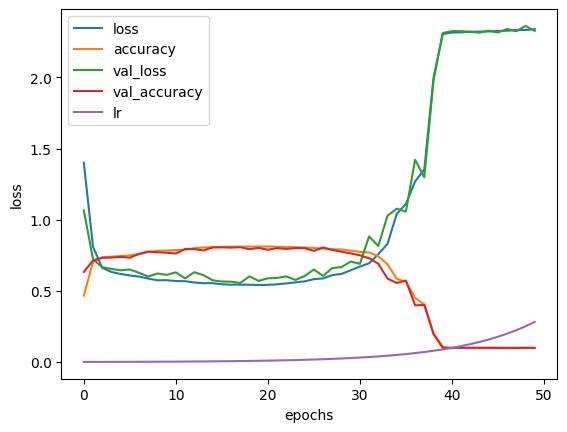

In [23]:
pd.DataFrame(norm_history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Text(0.5, 1.0, 'finding the ideal learning rate')

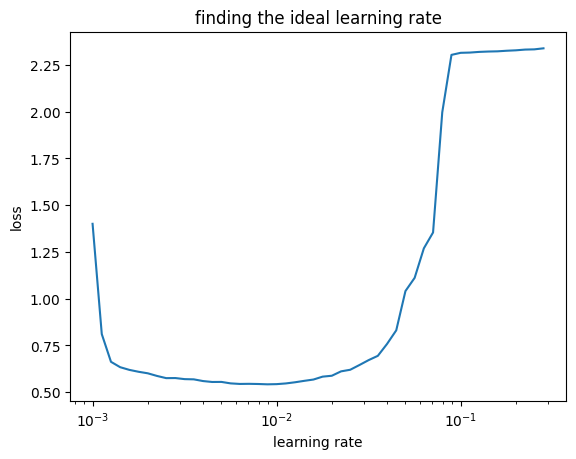

In [24]:
lrs = 1e-3 * (10**(tf.range(50)/20))
plt.semilogx(lrs, norm_history_3.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("finding the ideal learning rate")

## Mnist model 4 - Refitting with ideal learning rate

In [25]:
tf.random.set_seed(42)

# Create a model
mnist_model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compiel a model
mnist_model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=["accuracy"])


# Fit a model
norm_history_4 = mnist_model_4.fit(train_data_norm, train_labels, epochs=30, validation_data=(test_data_norm, test_labels))

Epoch 1/30
1875/1875 [==============================] - 6s 2ms/step - loss: 1.3935 - accuracy: 0.4854 - val_loss: 0.9033 - val_accuracy: 0.6726
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8301 - accuracy: 0.7016 - val_loss: 0.7944 - val_accuracy: 0.7172
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7526 - accuracy: 0.7271 - val_loss: 0.7608 - val_accuracy: 0.7122
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7117 - accuracy: 0.7362 - val_loss: 0.7135 - val_accuracy: 0.7393
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6874 - accuracy: 0.7429 - val_loss: 0.7220 - val_accuracy: 0.7459
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6462 - accuracy: 0.7726 - val_loss: 0.6764 - val_accuracy: 0.7710
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6263 - accuracy: 0.7814 - val_loss: 0.6498 - val_accuracy:

Text(0.5, 0, 'epochs')

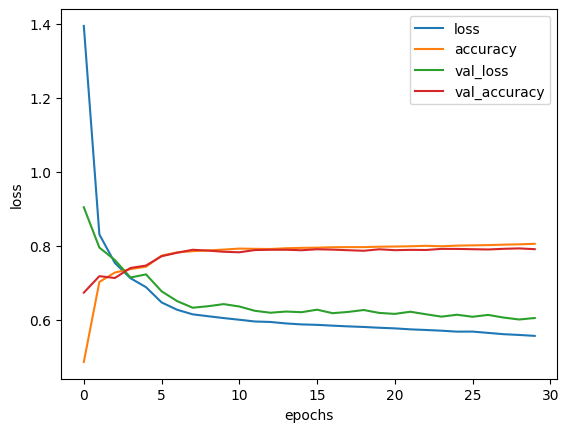

In [26]:
pd.DataFrame(norm_history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Evaluating the model

**NOTE** Make predictions on the same kind of data what it was trained on for eg. if data was normalized during training them prediction data should also be normalized

In [27]:
y_probs = mnist_model_4.predict(test_data_norm)

313/313 [==============================] - 1s 2ms/step


In [28]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 0, 1, 4, 6, 5, 7])

## make_confusion_matrix() function definition

In [29]:
import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, figsize = (20,20), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix", xlabel="Predicted Label", ylabel="True Label",
        xticks=np.arange(n_classes), yticks=np.arange(n_classes),
        xticklabels=labels, yticklabels=labels)

  threshold = (cm.max() + cm.min()) / 2


  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

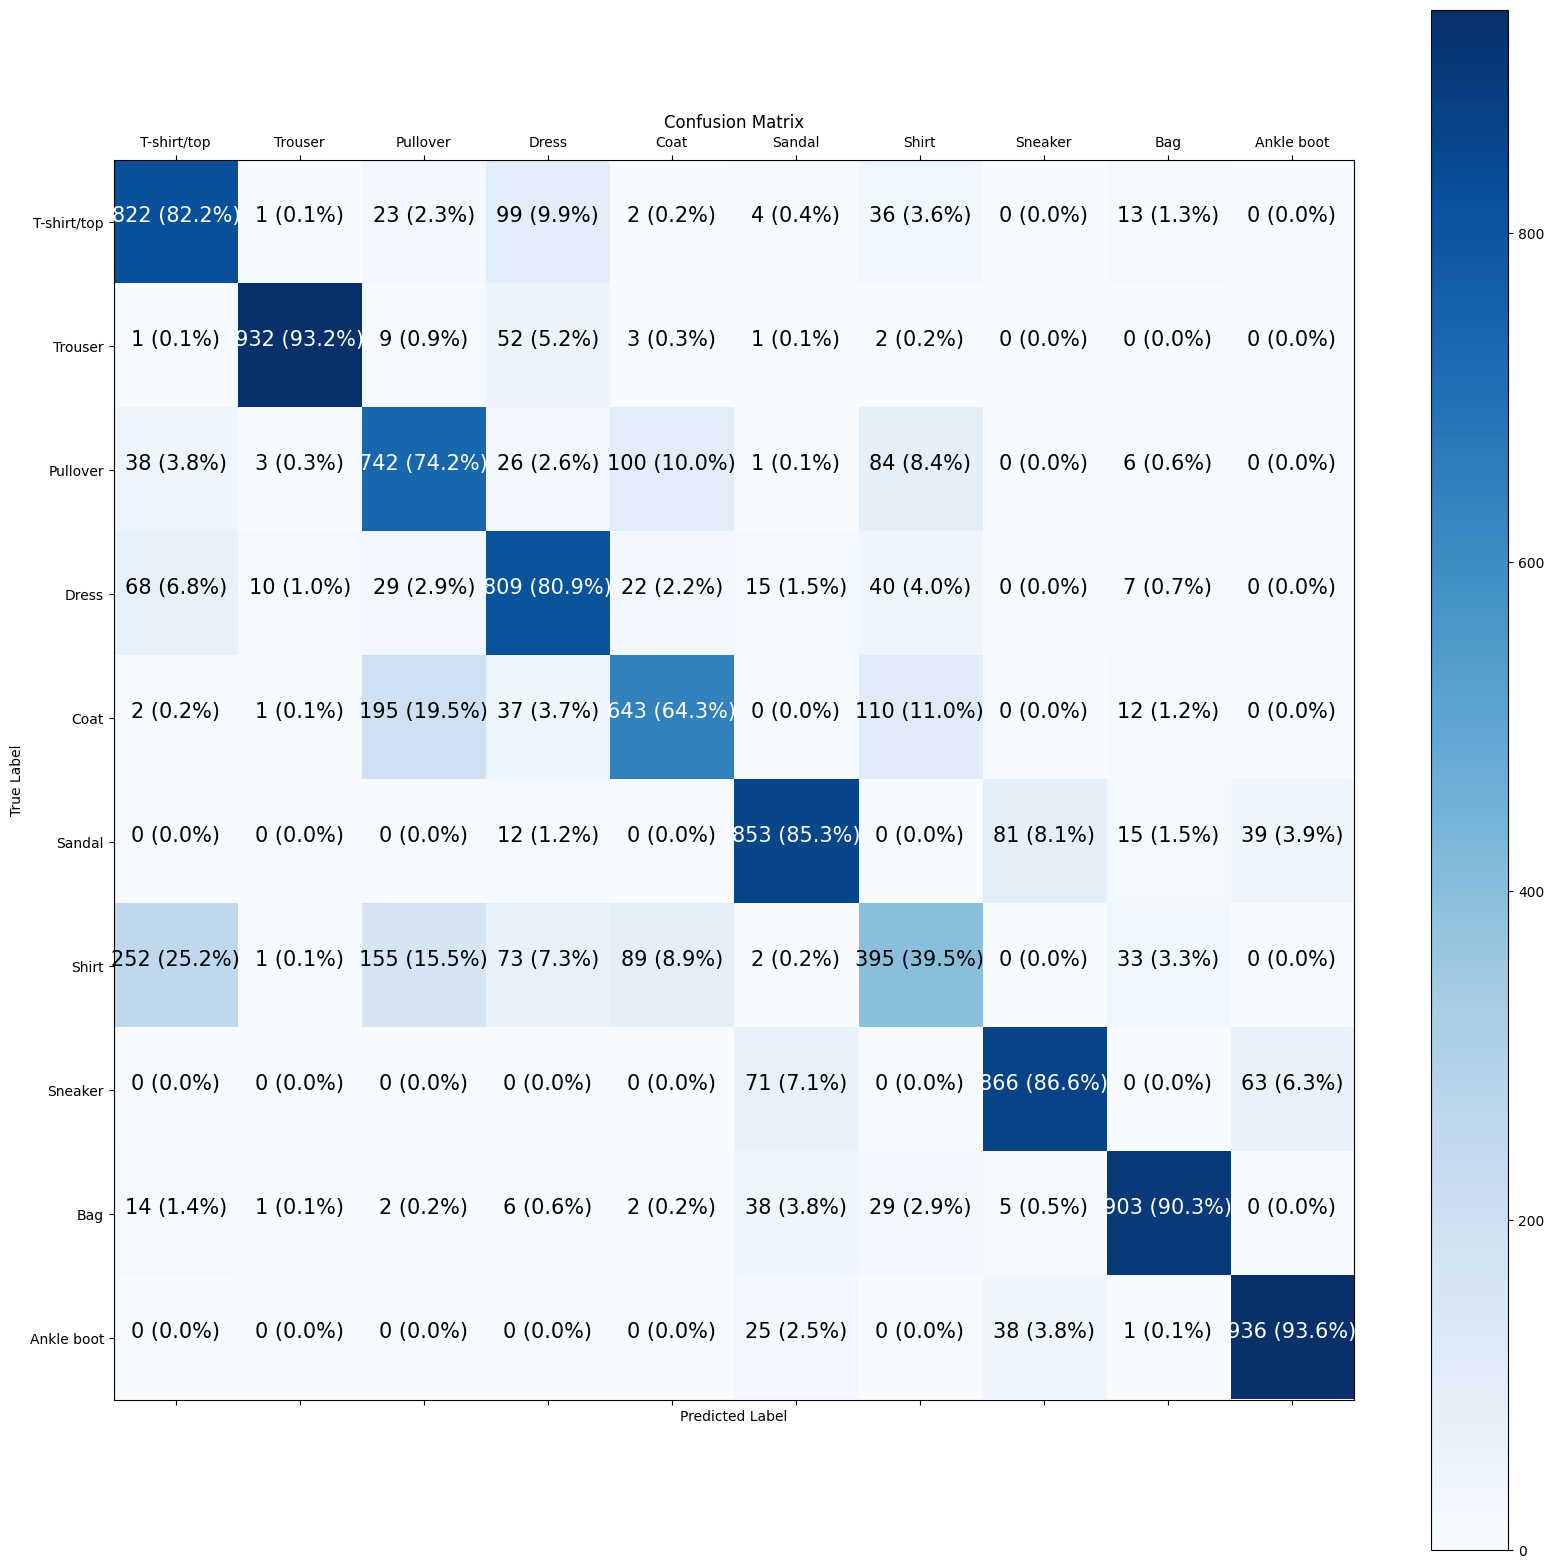

In [30]:
make_confusion_matrix(test_labels, y_preds, class_names)

In [31]:
import random

def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color=color)

1/1 [==============================] - 0s 14ms/step


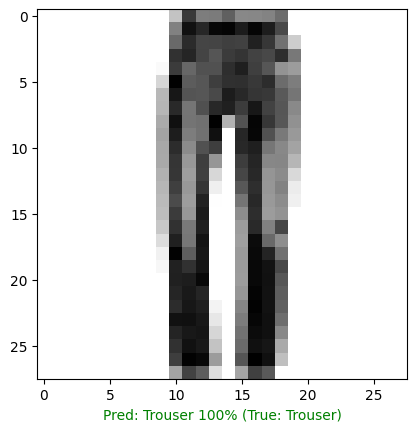

In [46]:
plot_random_image(mnist_model_4, test_data_norm, test_labels, class_names)

## What patterns is our model actually learning?

In [48]:
mnist_model_4.layers

In [49]:
mnist_model_4.layers[1]

In [58]:
mnist_model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
# Get the weights
weights, biases = mnist_model_4.layers[1].get_weights()

In [59]:
weights.shape

3136

In [57]:
biases.shape

(4,)

In [62]:
params_for_layer = weights.size + biases.size
params_for_layer

3140

In [66]:
weights, biases = mnist_model_4.layers[2].get_weights()
weights, biases

(array([[-0.14321274, -0.7221038 ,  1.3480823 , -0.01414908],
        [-0.33489648,  1.1156911 ,  0.12520705,  0.27243394],
        [ 0.4716568 ,  0.77324706,  0.35804567,  0.82661545],
        [-0.46818608,  0.01205058, -0.03814839,  1.5898306 ]],
       dtype=float32),
 array([-0.01406706,  1.2155302 ,  0.2757222 , -0.12621012], dtype=float32))